# Generate precipitation time series for the entire precipitation record

In [3]:
import yaml
import pandas as pd
from datetime import datetime
# create Pandas data frame from the weather data text file:
rain_data_file = pd.read_csv("Cohens_rain_data_philly_correct.dat", skiprows=2,header=None,delim_whitespace=True,
                              names=['city','year','month','day','hour','precip_inches'])
# Now generate a Pandas time series from the data frame created above 
# covering the entire period of the rain data file
rain_data = pd.Series()
for index, row in rain_data_file.iterrows():
    timestamp = pd.Timestamp(datetime(row['year'],row['month'],row['day'],row['hour']))
    rain_data[timestamp] = row['precip_inches']
#print(rain_data)

# Store the rain_data Pandas time series in a YAML file:
precipTimeSeriesFileNameStr = "Cohens_rain_data_philly_pandas_time_series.yaml"
f = open(precipTimeSeriesFileNameStr,'w')   
yaml.dump(rain_data,f)           # Read the LID ContribImpervArea and GreenedAcres
f.close() 

# Generate 15-min hyetograph for ANALYSIS YEAR

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: 
.resample() is now a deferred operation
You called resample(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead


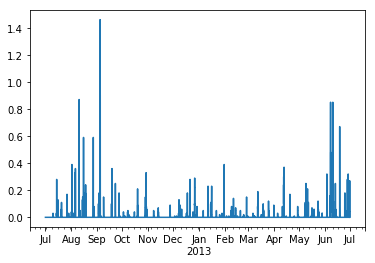

In [6]:
import yaml
import pandas as pd
from datetime import datetime

# For the year chosen for analysis, specify the starting and ending times
startDateTimeAnalysisYear = datetime(2012,7,1,0,0)
endDateTimeAnalysisYear = datetime(2013,6,30,23,45)

precipTimeSeriesFileNameStr = "Cohens_rain_data_philly_pandas_time_series.yaml"
f = open(precipTimeSeriesFileNameStr,'r')   
rain_data = yaml.load(f)           # Read the LID ContribImpervArea and GreenedAcres
f.close()
# reduce precipitation time series to include only the simulation period:
rain_data_analysis_year = rain_data[startDateTimeAnalysisYear:endDateTimeAnalysisYear]
# first upsample to create hourly data, repalcing NaNs with zeros

#rainDataSimulationPeriodHourly = rain_data_simulation_period.resample('H').ffill().fillna(0)
rainDataAnalysisYearHourly = rain_data_analysis_year.resample('H')


# now create a 15 minute hyetograph series
hyetographTimeSeriesAnalysisYear15Min = rainDataAnalysisYearHourly.resample('15min').ffill().fillna(0)

# store the 15 minute hyetograph for the entire analysis year in a YAML file:
hyetographTimeSeriesAnalysisYear15MinFileName = "Cohens_rain_data_15min_hyetograph_analysis_year.yaml"
f = open(hyetographTimeSeriesAnalysisYear15MinFileName,'w')
yaml.dump(hyetographTimeSeriesAnalysisYear15Min,f)
f.close()

# Plot the 15 min hyetograph for the analysis year
hyetographTimeSeriesAnalysisYear15Min.plot()